In [1]:
import anndata as ad
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import numpy as np
import scirpy as ir
import matplotlib as mpl
from scipy.sparse import csr_matrix
import matplotlib.ticker as ticker
mpl.rcParams['font.family'] = 'Arial'
figPath = "NKTCL-figure-2.18"
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 14

/home/rzh/BCY/lib/python3.10/site-packages/setuptools_scm/_integration/setuptools.py:30: RuntimeWarning: 
ERROR: setuptools==59.6.0 is used in combination with setuptools_scm>=8.x

Your build configuration is incomplete and previously worked by accident!
setuptools_scm requires setuptools>=61

Suggested workaround if applicable:
 - migrating from the deprecated setup_requires mechanism to pep517/518
   and using a pyproject.toml to declare build dependencies
   which are reliably pre-installed before running the build tools

  warnings.warn(


In [6]:
adata_T = sc.read_h5ad("/data/NKTCL/NKTCL_Multi/analysis/NKTCL-T-4.18.h5ad")
adata_T.obs['anno-subTfixed'].cat.categories

Index(['C01_Tn_CCR7', 'C02_Tcm_SELL', 'C03_Tcm_XCL1', 'C04_pTex_IFNG',
       'C05_tTex_TCF7', 'C06_tTex_CD8', 'C07_tTex_CD4', 'C08_Treg_FOXP3',
       'C09_Th_CXCL13', 'C10_Tn/Tcm_IL7R', 'C11_Tctl_GZMK', 'C12_Tprol_MKI67',
       'C13_Malig_MSI2', 'C14_NK/NKT_NCAM1', 'C15_mixed'],
      dtype='object')

In [2]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [3]:
anndata2ri.activate()

/tmp/ipykernel_2285995/4016445965.py:1: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [4]:
%load_ext rpy2.ipython

In [7]:
%%R
library(monocle)
library(monocle3)

Loading required package: Matrix
Loading required package: Biobase
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.

Loading required package: ggplot2
Loading required package: VGAM
Loading required package: stats4
Loading required pac

In [13]:
adata_subT = adata_T[~adata_T.obs['anno-subTfixed'].isin(['C14_NK/NKT_NCAM1', 'C15_mixed'])]
adata_subT = adata_subT[adata_subT.obs['batch'].isin(['NK11_0', 'NK11_1','NK5_0', 'NK5_1', 'NK6_0', 'NK6_1', 'NK7_0', 'NK7_1', 'NK8_0', 'NK8_1'])]
adata_subT

View of AnnData object with n_obs × n_vars = 34800 × 33727
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden-1', 'leiden-pca', 'anno-pca', 'treatment', 'leiden-T', 'annotation', 'cnv_status', 'cnv_score', 'exhaustion', 'cytotoxicity', 'anno-T', 'clonal_size', 'spot_size', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'anno-subT', 'anno-Tfixed', 'anno-subTfixed', 'proliferation', 'anno-subT1', 'anno-focus'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'airr:chain_pairing_colors', 'airr:clonal_expansion_colors', 'airr:clone_id_colors', 'airr:receptor_subtype_colors', 'airr:receptor_type_colors', 'anno-T_colors', 'anno-Tfixed_colors', 'a

In [50]:
adata_T.obs['anno-subTfixed'].cat.categories

Index(['C01_Tn_CCR7', 'C02_Tcm_SELL', 'C03_Tcm_XCL1', 'C04_pTex_IFNG',
       'C05_tTex_TCF7', 'C06_tTex_CD8', 'C07_tTex_CD4', 'C08_Treg_FOXP3',
       'C09_Th_CXCL13', 'C10_Tn/Tcm_IL7R', 'C11_Tctl_GZMK', 'C12_Tprol_MKI67',
       'C13_Malig_MSI2', 'C14_NK/NKT_NCAM1', 'C15_mixed'],
      dtype='object')

In [59]:
adata_CD4T = adata_T[adata_T.obs['anno-subTfixed'].isin([ 'C08_Treg_FOXP3',
       'C09_Th_CXCL13', 'C10_Tn/Tcm_IL7R', 'C11_Tctl_GZMK', 'C12_Tprol_MKI67',
       'C13_Malig_MSI2',])]
adata_CD4T = adata_CD4T[adata_CD4T.obs['batch'].isin(['NK11_0', 'NK11_1','NK5_0', 'NK5_1', 'NK6_0', 'NK6_1', 'NK7_0', 'NK7_1', 'NK8_0', 'NK8_1'])]
adata_CD4T

View of AnnData object with n_obs × n_vars = 18021 × 33727
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden-1', 'leiden-pca', 'anno-pca', 'treatment', 'leiden-T', 'annotation', 'cnv_status', 'cnv_score', 'exhaustion', 'cytotoxicity', 'anno-T', 'clonal_size', 'spot_size', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'anno-subT', 'anno-Tfixed', 'anno-subTfixed', 'proliferation', 'anno-subT1', 'anno-focus'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'airr:chain_pairing_colors', 'airr:clonal_expansion_colors', 'airr:clone_id_colors', 'airr:receptor_subtype_colors', 'airr:receptor_type_colors', 'anno-T_colors', 'anno-Tfixed_colors', 'a

In [60]:
adata_CD8T = adata_T[adata_T.obs['anno-subTfixed'].isin([ 'C01_Tn_CCR7', 'C02_Tcm_SELL', 'C03_Tcm_XCL1', 'C04_pTex_IFNG',
       'C05_tTex_TCF7', 'C06_tTex_CD8', 'C07_tTex_CD4','C12_Tprol_MKI67',
       'C13_Malig_MSI2',])]
adata_CD8T = adata_CD8T[adata_CD8T.obs['batch'].isin(['NK11_0', 'NK11_1','NK5_0', 'NK5_1', 'NK6_0', 'NK6_1', 'NK7_0', 'NK7_1', 'NK8_0', 'NK8_1'])]
adata_CD8T

View of AnnData object with n_obs × n_vars = 22616 × 33727
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden-1', 'leiden-pca', 'anno-pca', 'treatment', 'leiden-T', 'annotation', 'cnv_status', 'cnv_score', 'exhaustion', 'cytotoxicity', 'anno-T', 'clonal_size', 'spot_size', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'anno-subT', 'anno-Tfixed', 'anno-subTfixed', 'proliferation', 'anno-subT1', 'anno-focus'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'airr:chain_pairing_colors', 'airr:clonal_expansion_colors', 'airr:clone_id_colors', 'airr:receptor_subtype_colors', 'airr:receptor_type_colors', 'anno-T_colors', 'anno-Tfixed_colors', 'a

In [14]:
%%R -i adata_subT
sce <- adata_subT

In [ ]:
%%R
gene_metadata <- as.data.frame(rownames(sce))
rownames(gene_metadata) <- rownames(sce)
colnames(gene_metadata) <- c("gene_short_name")

In [16]:
%%R
cds <- new_cell_data_set(expression_data = sce@assays@data$X, 
                         cell_metadata = as.data.frame(sce@colData),
                         gene_metadata = gene_metadata)

reducedDim(cds, "UMAP") <- reducedDim(sce, "UMAP")

  |======================================================================| 100%


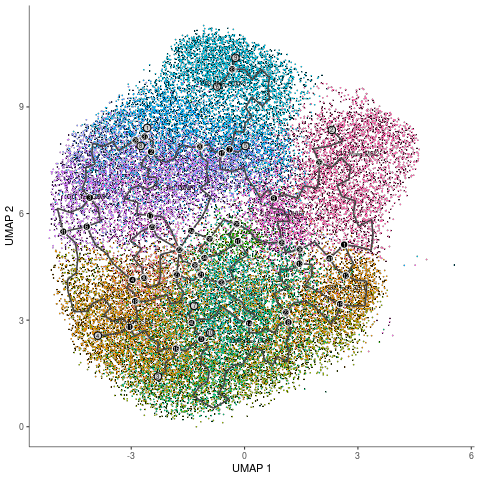

In [17]:
%%R
cds <- cluster_cells(cds)
cds <- learn_graph(cds)
plot_cells(cds, color_cells_by="anno.subTfixed")

In [18]:
%%R
pdf("NKTCL-figure-2.18/T-monocle3-anno.pdf", width = 8, height = 6)

# 绘制图形
p <- plot_cells(cds, 
                color_cells_by = "anno.subTfixed", 
                reduction_method = "UMAP",
                label_principal_points = TRUE)
print(p)

# 关闭 PDF 设备
dev.off()

png 
  2 


In [20]:
%%R
pdf("NKTCL-figure-2.18/T-monocle3-pseudotime.pdf", width = 8, height = 6)
cds <- order_cells(cds, root_pr_nodes = "Y_179")
p <- plot_cells(
  cds,
  color_cells_by = "pseudotime",
  label_groups_by_cluster = FALSE,
  label_leaves = FALSE,
  label_branch_points = FALSE,
  graph_label_size = 3
)
print(p)
dev.off()

png 
  2 


Cells aren't colored in a way that allows them to be grouped.


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


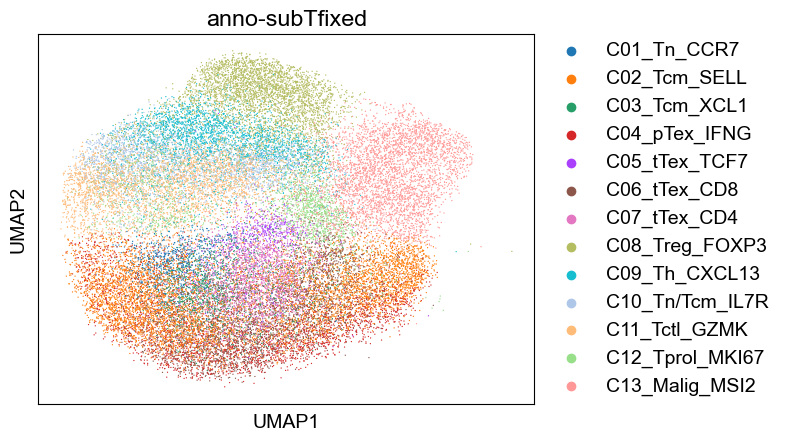

In [19]:
sc.pl.umap(adata_subT, color=['anno-subTfixed'])

In [21]:
import scanpy as sc

from gene_trajectory.add_gene_bin_score import add_gene_bin_score
from gene_trajectory.coarse_grain import select_top_genes, coarse_grain_adata
from gene_trajectory.extract_gene_trajectory import get_gene_embedding, extract_gene_trajectory
from gene_trajectory.get_graph_distance import get_graph_distance
from gene_trajectory.gene_distance_shared import cal_ot_mat
from gene_trajectory.run_dm import run_dm
from gene_trajectory.plot.gene_trajectory_plots import plot_gene_trajectory_3d, plot_gene_trajectory_umap, plot_gene_trajectory_2d
from gene_trajectory.util.download_file import download_file_if_missing

In [22]:
from datetime import datetime

def timeprint(string):
  print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}] {string}")

def run_gene_trajectory(adata, add_genes=[]):
  timeprint("Start running gene trajectory...")
  genes = select_top_genes(adata, layer='Raw', n_variable_genes=500)
  timeprint(f"Found {len(genes)} highly variable genes.")
  genes = list(genes)
  genes.extend(add_genes)
  genes = np.unique(genes)
  run_dm(adata)
  timeprint("Running Cell graph...")
  cell_graph_dist = get_graph_distance(adata, k=10)
  gene_expression_updated, graph_dist_updated = coarse_grain_adata(adata, graph_dist=cell_graph_dist, features=genes, n=500)
  timeprint("Evaluating gene distance...")
  gene_dist_mat = cal_ot_mat(gene_expr=gene_expression_updated, 
                           ot_cost=graph_dist_updated, 
                           show_progress_bar=True)
  timeprint("Generating gene distance...")
  gene_embedding, _ = get_gene_embedding(gene_dist_mat, k = 5)
  timeprint("Generating gene_trajectory...")
  gene_trajectory = extract_gene_trajectory(gene_embedding, gene_dist_mat, t_list = [4, 8, 7], gene_names=genes, k=5)
  return gene_trajectory

def refine_gene_trajectory(adata, genes):
  timeprint("Running Cell graph...")
  cell_graph_dist = get_graph_distance(adata, k=10)
  gene_expression_updated, graph_dist_updated = coarse_grain_adata(adata, graph_dist=cell_graph_dist, features=genes, n=500)
  timeprint("Evaluating gene distance...")
  gene_dist_mat = cal_ot_mat(gene_expr=gene_expression_updated, 
                           ot_cost=graph_dist_updated, 
                           show_progress_bar=True)
  timeprint("Generating gene distance...")
  gene_embedding, _ = get_gene_embedding(gene_dist_mat, k = 5)
  timeprint("Generating gene_trajectory...")
  gene_trajectory = extract_gene_trajectory(gene_embedding, gene_dist_mat, t_list = [4, 8, 7], gene_names=genes, k=5)
  return gene_trajectory

In [23]:
gene_trajectory_T = run_gene_trajectory(adata_subT, add_genes=['HLA-DQA1', 'SELL','CCR7','PDCD1', 'GZMK', 'ENTPD1', 'TIGIT', 'HAVCR2', 'CD200','TCF7', 'IL7R', 'ZNF683', 'LAG3', 'CTLA4', 'MSI2', 'XIST', 'CXCL13', 'DAB1', 'KSR1', 'TTN', 'TK1', 'CD38'])

[2025-05-23 08:05:16] Start running gene trajectory...


/home/rzh/BCY/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


[2025-05-23 08:05:26] Found 365 highly variable genes.
[2025-05-23 08:28:27] Running Cell graph...
[2025-05-23 08:33:07] Evaluating gene distance...


100%|██████████| 72390/72390 [00:15<00:00, 4604.07it/s] 


[2025-05-23 08:34:35] Generating gene distance...
[2025-05-23 08:34:35] Generating gene_trajectory...


Early stop reached. 0 gene trajectories were retrieved.


In [44]:
gene_trajectory_T.sort_values(by='Pseudoorder-1')[50:100]

,DM_1,DM_2,DM_3,DM_4,DM_5,selected,Pseudoorder-1
VCAM1,-0.003296,0.002043,0.003375,0.003169,-0.000400,Trajectory-1,51.0
TCF7,-0.003173,-0.001834,-0.000302,-0.000873,-0.000670,Trajectory-1,52.0
AREG,-0.003121,-0.000438,0.000787,0.001159,-0.000954,Trajectory-1,53.0
TNFSF9,-0.003167,0.001770,0.002974,0.003222,-0.000512,Trajectory-1,54.0
IGKV3-15,-0.003061,-0.001758,-0.000165,-0.000994,-0.000680,Trajectory-1,55.0
IGHG2,-0.003026,-0.000908,0.000153,-0.000165,-0.000706,Trajectory-1,56.0
LHFPL6,-0.003003,-0.000807,0.000460,0.000264,-0.000962,Trajectory-1,57.0
IGKC,-0.003001,-0.001258,-0.000135,-0.000357,-0.000838,Trajectory-1,58.0
TRAV22,-0.002917,-0.001164,-0.000078,-0.000660,-0.000624,Trajectory-1,59.0
GADD45G,-0.002833,-0.000737,-0.000037,0.000364,-0.000801,Trajectory-1,60.0


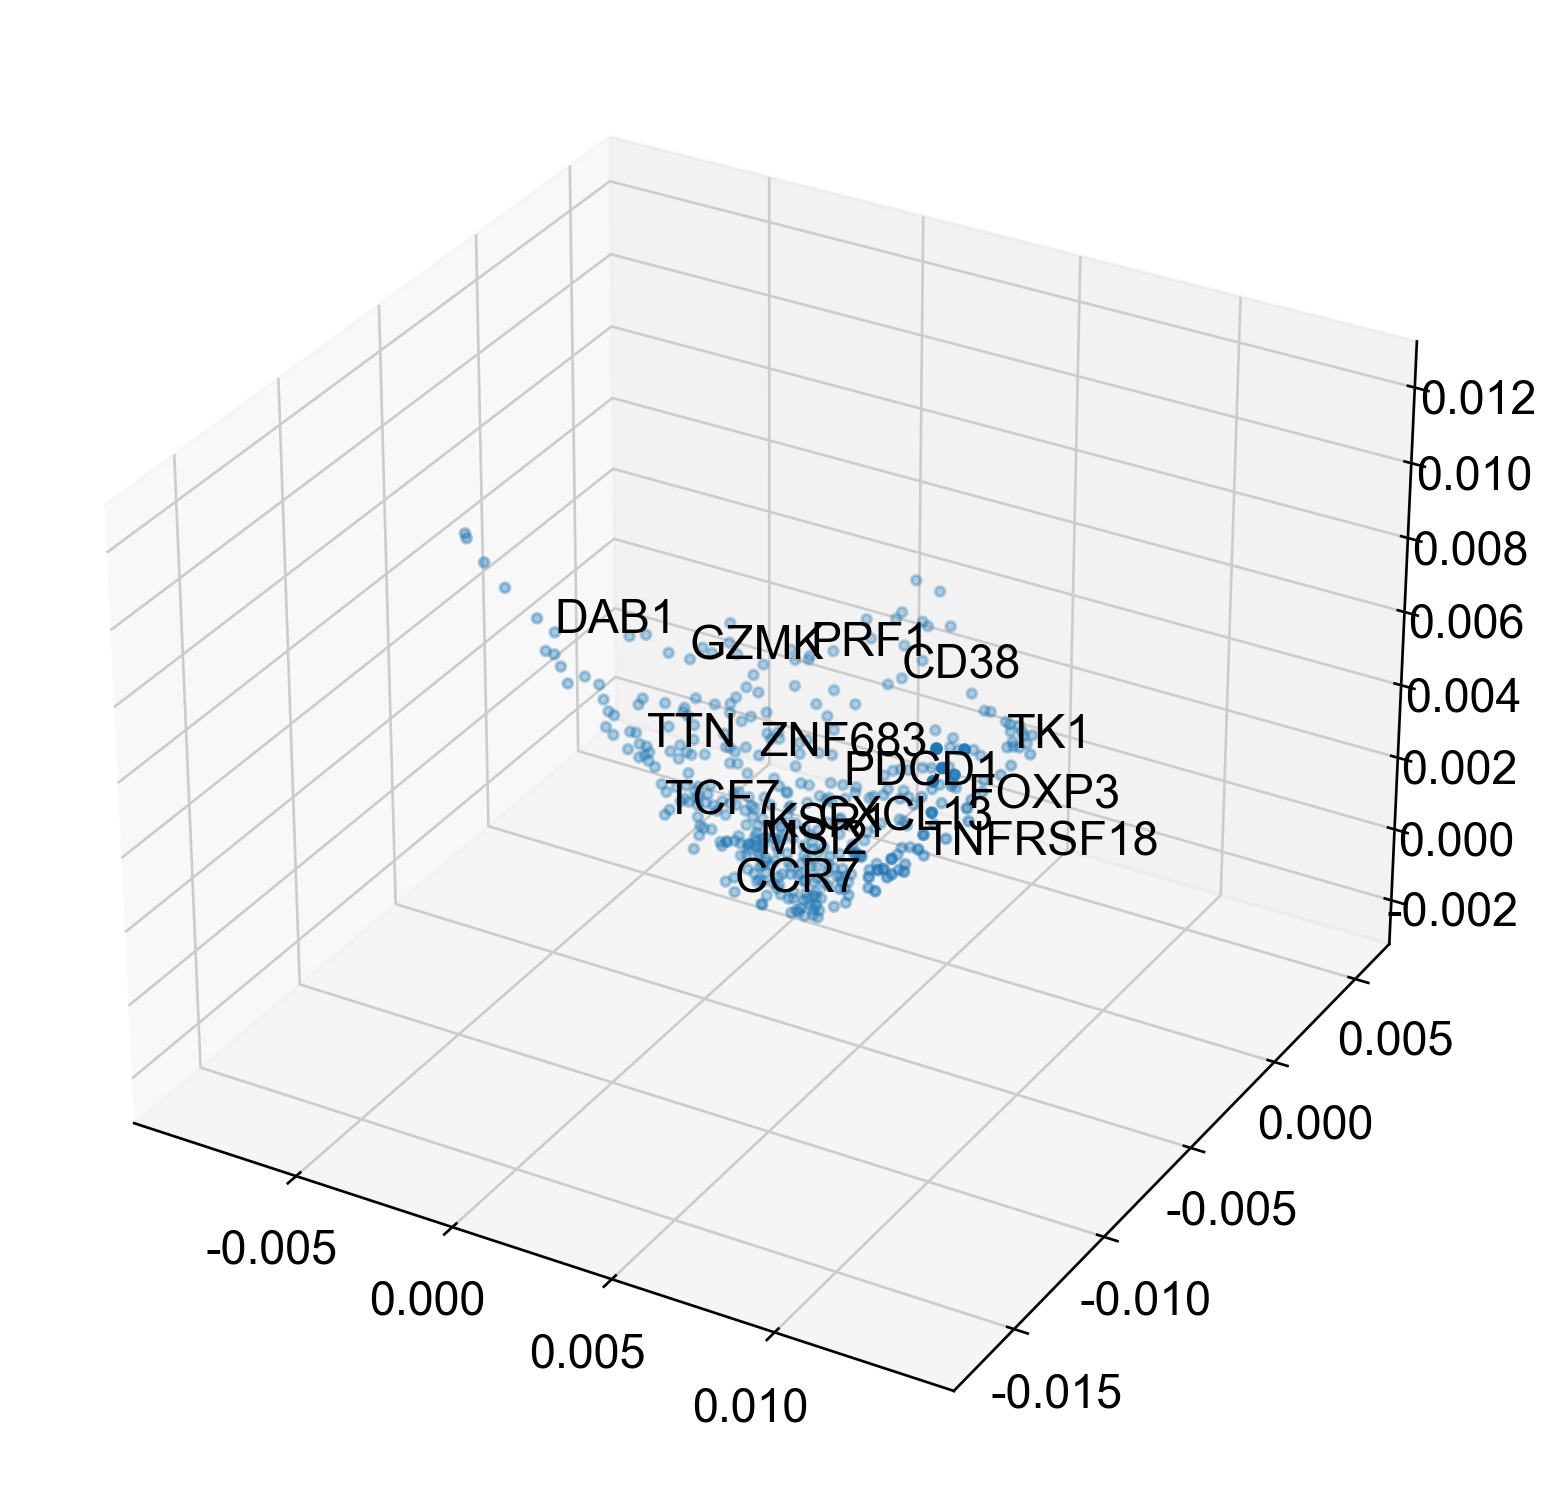

In [69]:
fig = plt.figure(figsize=(8, 8))  # 宽度10英寸，高度8英寸
ax = fig.add_subplot(111, projection='3d')
label_genes=['TTN','DAB1','ZNF683','PRF1','KSR1','GZMK','TNFRSF18','CD38','PDCD1','CCR7', 'MSI2',  'CXCL13','TCF7','TK1','FOXP3']
gene_trajectory = gene_trajectory_T
s=8
selections = pd.Categorical(gene_trajectory.selected)

for c in 'DM_1', 'DM_2', 'DM_3', 'selected':
    if c not in gene_trajectory.columns:
        raise ValueError(f'Column {c} is not present in gene trajectory DataFrame')
for c in selections.categories:
    idxs = selections == c
    ax.scatter(xs=gene_trajectory['DM_1'][idxs],
                ys=gene_trajectory['DM_2'][idxs],
                zs=gene_trajectory['DM_3'][idxs],
                s=s,
                label=c)

if label_genes:
    for g in label_genes:
        ax.text(x=gene_trajectory['DM_1'][g],
                y=gene_trajectory['DM_2'][g],
                z=gene_trajectory['DM_3'][g],
                s=g)
fig.savefig(f"{figPath}/gene_trajectory_T.svg", bbox_inches='tight')

In [ ]:
import pyVIA.core as via
#set parameters for Via 2.0
memory=100 #this is a high memory value and will result in probabilistic pathways that avoid transitioning into unrelated cell populations 
cluster_graph_pruning = 0.15 #level of pruning done on the cluster graph. higher number means less pruning (values can range from 0-3 standard deviations)
edgepruning_clustering_resolution = 0.15  # regulates number of clusters. Higher values means fewer clusters (values can range from 0-3 standard deviations)
random_seed = 1234 
knn = 30  # number of neighbors in the knn graph
knn_sequential = 15  # number of neighbors additionally created between sequentially adjacent time points 
n_pcs = 10 # number of principal components
velo_weight = 0  # 0.7 #weight given to velocity based direction compared to pseudotime based direction
t_diff_step = 1 #edges extending between nodes that are more than 2 time steps apart will be removed (i.e. equal to 3 or more time steps apart)
root = ['C01_Tn_CCR7'] #for reproducibility, we set the root here. the group level root assignment must correspond to a label that exists in the True-label parameter (must be passed inside a list). For autodetection based on rna-velocity it can be left as None. A single cell index can also be passed e.g. [256], means the 256th cell will be used as a root. Since we will be using the velocity matrices (see below), Via 2.0 will suggest a list of likely root cell states that the user can decide to choose between. It is helpful to examine the top 5 suggested roots and choose the one that seems most reasonable. Note in the output that Via 2.0's suggestions are almost all in the epibliast or Primitive streak state 
neighboring_terminal_states_threshold = 4
max_visual_outgoing_edges = 10#5 #used in differentiation flow chart plots
time_series = True
parc_numeric_cluster_labels = [i for i in adata_subT.obs['leiden-T']]
cluster_celltype_label = [i for i in adata_subT.obs['anno-subTfixed']]
use_velocity = False
velo_weight = 0.5

if use_velocity:
    gene_matrix =np.asmatrix(adata_subT.layers['Ms'])
    velocity_matrix = np.asmatrix(adata_subT.layers['velocity'])
    velo_weight=velo_weight
else: 
    gene_matrix =None
    velocity_matrix = None
    velo_weight=0
vT = via.VIA(adata_subT.obsm['X_pca_harmony'][:, 0:n_pcs], true_label = cluster_celltype_label,
        edgepruning_clustering_resolution=edgepruning_clustering_resolution,
        edgepruning_clustering_resolution_local=1, knn=knn, memory=memory,
        root_user=root, random_seed=random_seed,
        knn_sequential_reverse=knn_sequential,
        gene_matrix=gene_matrix, velocity_matrix=velocity_matrix,
        velo_weight=velo_weight,
        )

/home/rzh/BCY/lib/python3.10/site-packages/phate/__init__.py


In [48]:
from datetime import datetime
print(f'{datetime.now()}\tRun Via2.0')
vT.run_VIA()
print(f'{datetime.now()}\tEnd Via2.0 computation')

2025-05-23 09:16:22.020959	Run Via2.0
2025-05-23 09:16:22.021815	Running VIA over input data of 34800 (samples) x 10 (features)
2025-05-23 09:16:22.021852	Knngraph has 30 neighbors
2025-05-23 09:16:33.425180	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 48.6 % of edges. 
2025-05-23 09:16:33.642496	Number of connected components used for clustergraph  is 1
2025-05-23 09:16:36.496207	Commencing community detection
2025-05-23 09:16:41.310779	Finished community detection. Found 50 clusters.
2025-05-23 09:16:41.320938	Merging 33 very small clusters (<10)
2025-05-23 09:16:41.327531	Finished detecting communities. Found 17 communities
2025-05-23 09:16:41.329599	Making cluster graph. Global cluster graph pruning level: 0.15
2025-05-23 09:16:41.509790	Graph has 1 connected components before pruning
2025-05-23 09:16:41.511767	Graph has 1 connected components after pruning
2025-05-23 09:16:41.511929	Graph has 1 connected components after reconnecting
2025-05-2

/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/core.py:176: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  g.set_node_ids(node_ids=None,


  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
2025-05-23 09:16:49.522876	Identifying terminal clusters corresponding to unique lineages...
2025-05-23 09:16:49.522897	Closeness:[0, 1, 4, 5, 9, 11, 12]
2025-05-23 09:16:49.522907	Betweenness:[1, 2, 4, 5, 9, 10, 11, 15, 16]
2025-05-23 09:16:49.522913	Out Degree:[0, 1, 4, 5, 9, 10, 11, 12, 16]
2025-05-23 09:16:49.523099	Cluster 0 had 3 or more neighboring terminal states [1, 5, 9, 11, 12] and so we removed cluster 12
2025-05-23 09:16:49.523127	Cluster 1 had 3 or more neighboring terminal states [0, 5, 9, 10, 11, 16] and so we removed cluster 16
2025-05-23 09:16:49.523151	Cluster 5 had 3 or more neighboring terminal states [0, 1, 9, 11] and so we removed cluster 0
2025-05-23 09:16:49.523166	Cluster 9 had 3 or more neighboring terminal states [1, 4, 5, 11] and so we removed cluster 4
2025-05-23 09:16:49.523187	Cluster 11 had 3 or more neighboring terminal states [1, 5, 9, 10] and so we removed cluster 10
2025-05-23 09:16:49.523324	Term

/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/core.py:176: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  g.set_node_ids(node_ids=None,


  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-23 09:16:54.746489	Cluster or terminal cell fate 1 is reached 211.0 times
2025-05-23 09:16:54.778628	Cluster or terminal cell fate 5 is reached 374.0 times
2025-05-23 09:16:54.810301	Cluster or terminal cell fate 9 is reached 400.0 times
2025-05-23 09:16:54.841688	Cluster or terminal cell fate 11 is reached 400.0 times
2025-05-23 09:16:54.873382	There are (4) terminal clusters corresponding to unique lineages {1: 'C11_Tctl_GZMK', 5: 'C10_Tn/Tcm_IL7R', 9: 'C09_Th_CXCL13', 11: 'C11_Tctl_GZMK'}
2025-05-23 09:16:54.873413	Begin projection of pseudotime and lineage likelihood
2025-05-23 09:16:56.025101	Cluster graph layout based on forward biasing
2025-05-23 09:16:56.026546	Starting make edgebundle viagraph...
2025-05-23 09:16:56.026577	Make via clustergraph edgebundle
2025-05-23 09:16:59.177458	Hammer dims: Nodes shape: (17, 2) Edges shape: (94, 3)
2025-05-23 09:16:59.178436	Graph has 1 connected components before pruning
2025-05-23 09:16:59.180691	Graph has 4 connected components 

/home/rzh/BCY/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2025-05-23 09:17:27.091077	Plot Via2.0 cluster graph


/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/plotting_via.py:3702: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(node_pos[:, 0], node_pos[:, 1],


tune edges False


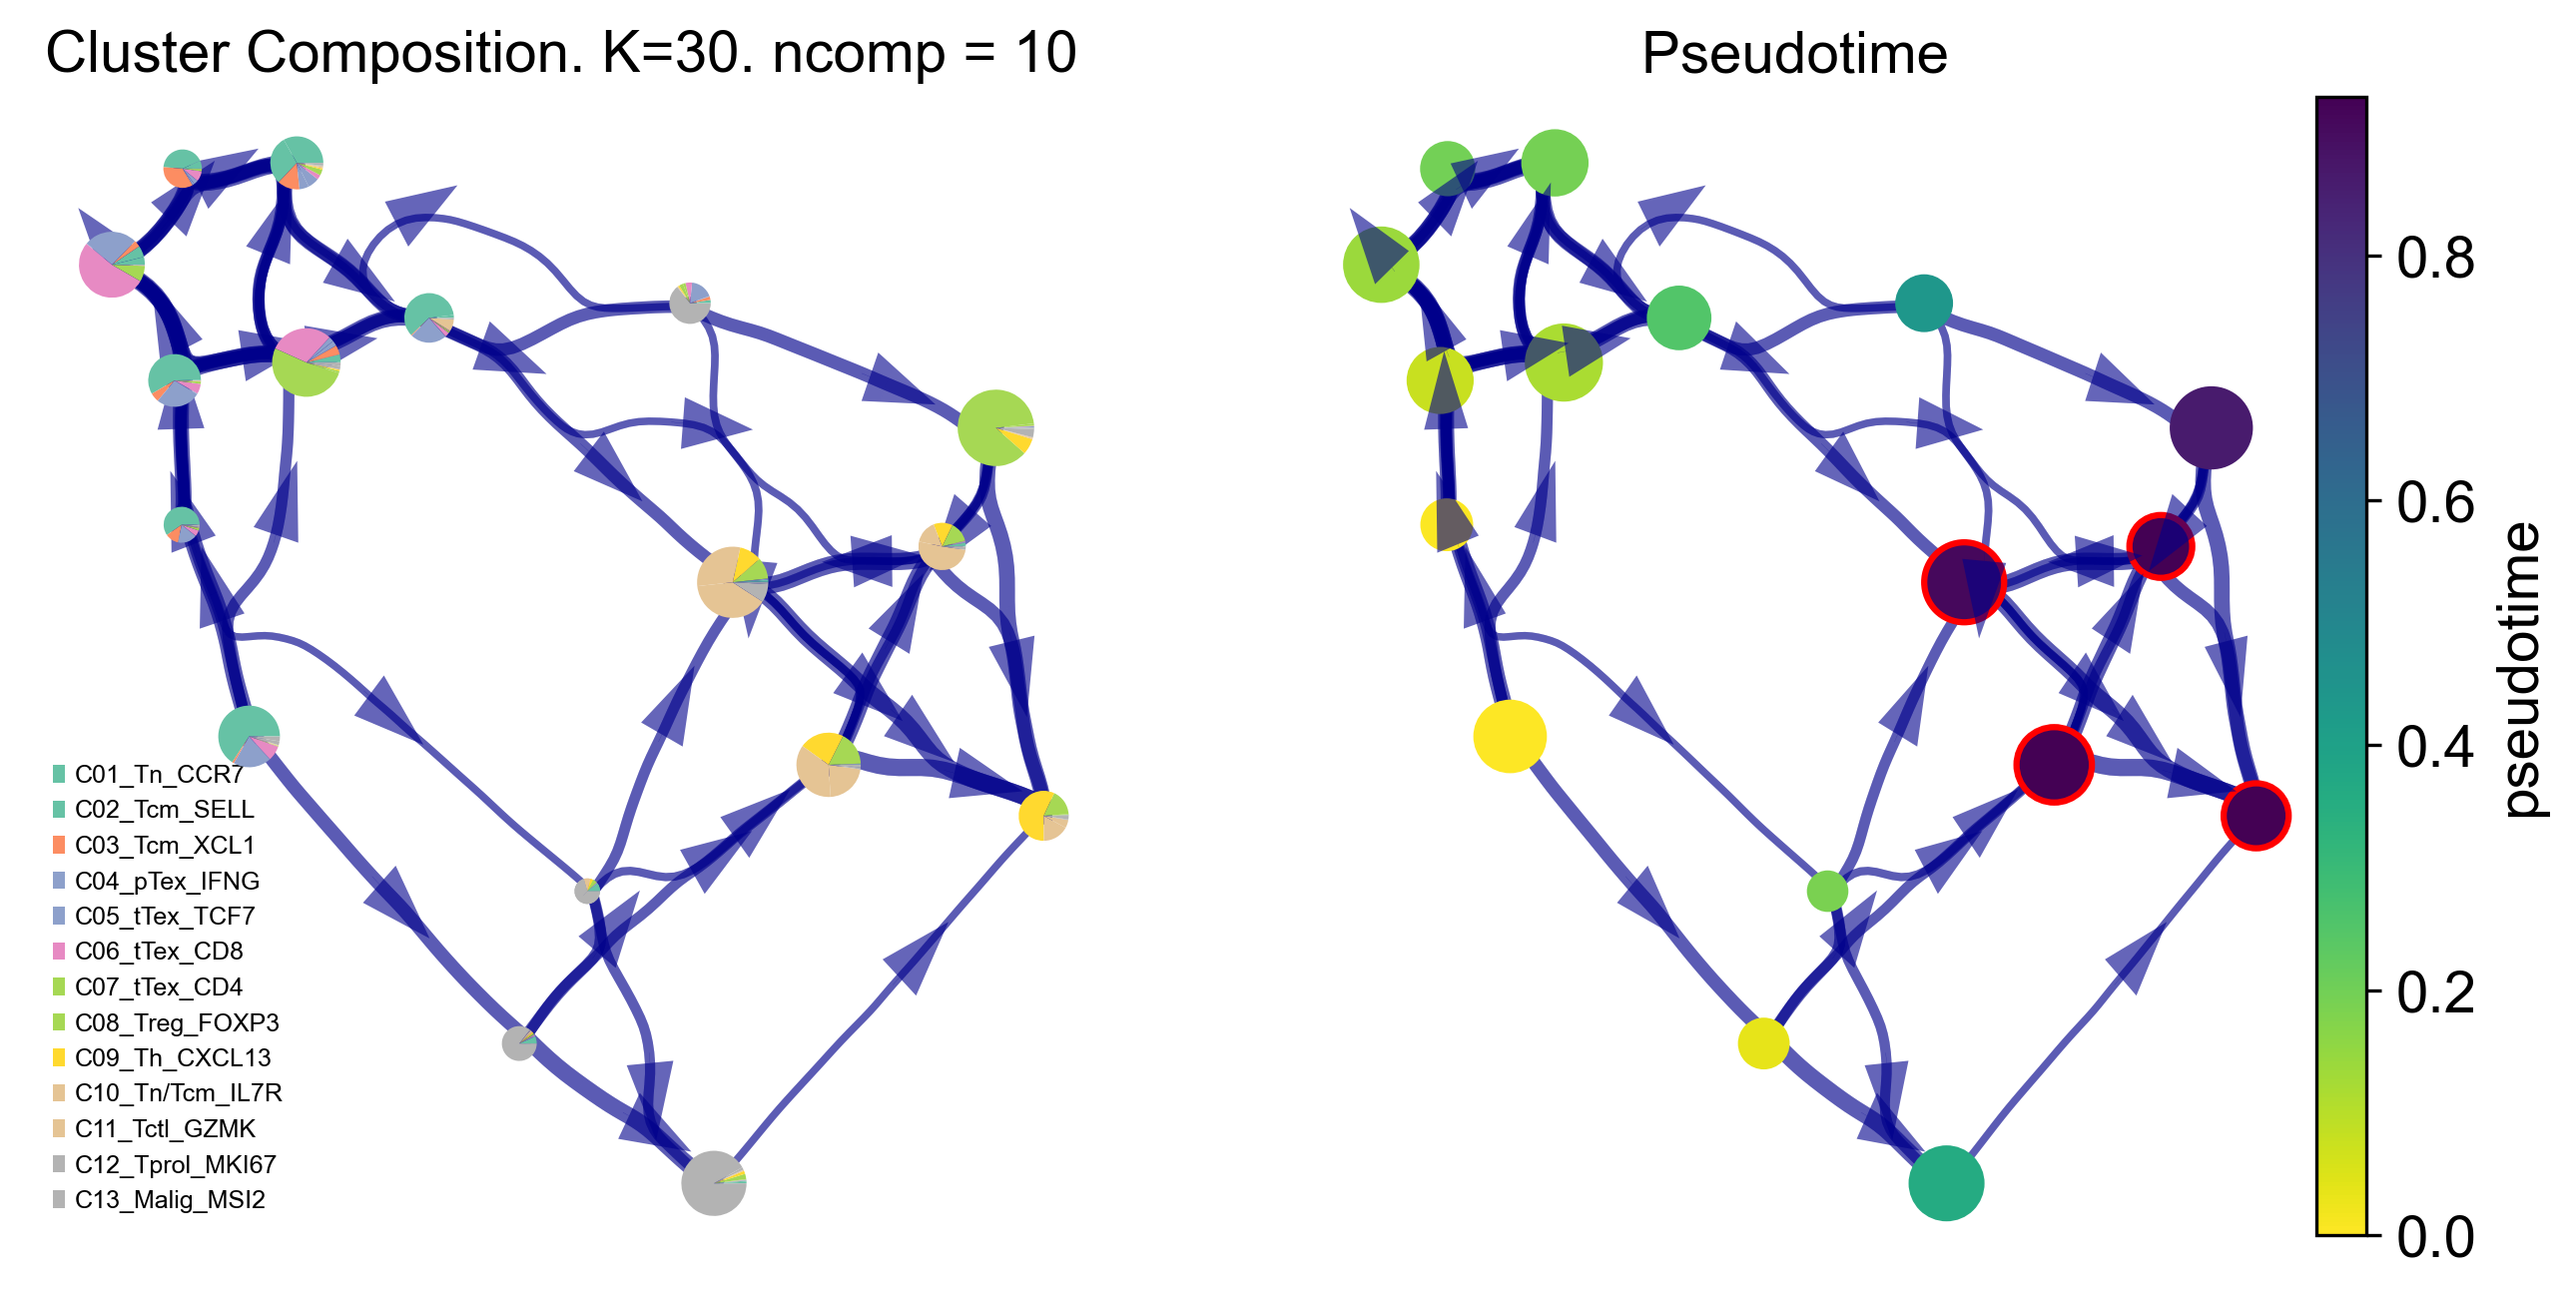

In [49]:
print(f'{datetime.now()}\tPlot Via2.0 cluster graph')

# f, ax, ax1=via.plot_piechart_viagraph(via_object=v0, cmap_piechart='viridis_r', cmap='viridis_r',  reference_labels=cluster_celltype_label, headwidth_arrow=0.4,
#                         highlight_terminal_clusters=True, show_legend=True)
# f.set_size_inches(10, 5)
f, ax, ax1=via.plot_piechart_viagraph(via_object=vT, headwidth_arrow=0.2, show_legend=True, ax_text=False, pie_size_scale=0.6, cmap_piechart='Set2', 
                        highlight_terminal_clusters=True, size_node_notpiechart=0.8)
f.set_size_inches(10, 5)
f.savefig(f'{figPath}/pyVIA_T.svg')

In [62]:
adata_CD4T.obs['anno-subTfixed'].cat.categories

Index(['C08_Treg_FOXP3', 'C09_Th_CXCL13', 'C10_Tn/Tcm_IL7R', 'C11_Tctl_GZMK',
       'C12_Tprol_MKI67', 'C13_Malig_MSI2'],
      dtype='object')

In [63]:
root = ['C10_Tn/Tcm_IL7R'] #for reproducibility, we set the root here. the group level root assignment must correspond to a label that exists in the True-label parameter (must be passed inside a list). For autodetection based on rna-velocity it can be left as None. A single cell index can also be passed e.g. [256], means the 256th cell will be used as a root. Since we will be using the velocity matrices (see below), Via 2.0 will suggest a list of likely root cell states that the user can decide to choose between. It is helpful to examine the top 5 suggested roots and choose the one that seems most reasonable. Note in the output that Via 2.0's suggestions are almost all in the epibliast or Primitive streak state 
neighboring_terminal_states_threshold = 4
max_visual_outgoing_edges = 10#5 #used in differentiation flow chart plots
time_series = True
parc_numeric_cluster_labels = [i for i in adata_CD4T.obs['leiden-T']]
cluster_celltype_label = [i for i in adata_CD4T.obs['anno-subTfixed']]
use_velocity = False
velo_weight = 0.5
vCD4T = via.VIA(adata_CD4T.obsm['X_pca_harmony'][:, 0:n_pcs], true_label = cluster_celltype_label,
        edgepruning_clustering_resolution=edgepruning_clustering_resolution,
        edgepruning_clustering_resolution_local=1, knn=knn, memory=memory,
        root_user=root, random_seed=random_seed,
        knn_sequential_reverse=knn_sequential,
        gene_matrix=gene_matrix, velocity_matrix=velocity_matrix,
        velo_weight=velo_weight,
        )
print(f'{datetime.now()}\tRun Via2.0')
vCD4T.run_VIA()
print(f'{datetime.now()}\tEnd Via2.0 computation')

2025-05-23 11:25:28.972597	Run Via2.0
2025-05-23 11:25:28.972797	Running VIA over input data of 18021 (samples) x 10 (features)
2025-05-23 11:25:28.972827	Knngraph has 30 neighbors
2025-05-23 11:25:34.879140	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 48.4 % of edges. 
2025-05-23 11:25:34.988365	Number of connected components used for clustergraph  is 1
2025-05-23 11:25:36.351567	Commencing community detection
2025-05-23 11:25:38.682057	Finished community detection. Found 29 clusters.
2025-05-23 11:25:38.687165	Merging 13 very small clusters (<10)
2025-05-23 11:25:38.690765	Finished detecting communities. Found 16 communities
2025-05-23 11:25:38.691945	Making cluster graph. Global cluster graph pruning level: 0.15
2025-05-23 11:25:38.784177	Graph has 1 connected components before pruning
2025-05-23 11:25:38.785960	Graph has 1 connected components after pruning
2025-05-23 11:25:38.786128	Graph has 1 connected components after reconnecting
2025-05-2

/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/core.py:176: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  g.set_node_ids(node_ids=None,


  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
2025-05-23 11:25:43.961224	Identifying terminal clusters corresponding to unique lineages...
2025-05-23 11:25:43.961243	Closeness:[0, 3, 4, 5, 6, 9, 11, 12]
2025-05-23 11:25:43.961252	Betweenness:[1, 2, 4, 6, 7, 8, 9, 10, 14]
2025-05-23 11:25:43.961258	Out Degree:[0, 4, 5, 6, 7, 9, 12, 13]
2025-05-23 11:25:43.961429	Cluster 5 had 3 or more neighboring terminal states [4, 6, 12] and so we removed cluster 12
2025-05-23 11:25:43.961580	Terminal clusters corresponding to unique lineages in this component are [0, 4, 5, 6, 7, 9] 
2025-05-23 11:25:43.961597	Calculating lineage probability at memory 100


/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/core.py:176: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  g.set_node_ids(node_ids=None,


  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-23 11:25:48.254553	Cluster or terminal cell fate 0 is reached 382.0 times
2025-05-23 11:25:48.284715	Cluster or terminal cell fate 4 is reached 298.0 times
2025-05-23 11:25:48.315487	Cluster or terminal cell fate 5 is reached 115.0 times
2025-05-23 11:25:48.347080	Cluster or terminal cell fate 6 is reached 307.0 times
2025-05-23 11:25:48.372408	Cluster or terminal cell fate 7 is reached 565.0 times
2025-05-23 11:25:48.403504	Cluster or terminal cell fate 9 is reached 14.0 times
2025-05-23 11:25:48.427209	There are (6) terminal clusters corresponding to unique lineages {0: 'C11_Tctl_GZMK', 4: 'C13_Malig_MSI2', 5: 'C13_Malig_MSI2', 6: 'C13_Malig_MSI2', 7: 'C08_Treg_FOXP3', 9: 'C12_Tprol_MKI67'}
2025-05-23 11:25:48.427238	Begin projection of pseudotime and lineage likelihood
2025-05-23 11:25:48.928744	Cluster graph layout based on forward biasing
2025-05-23 11:25:48.929859	Starting make edgebundle viagraph...
2025-05-23 11:25:48.929880	Make via clustergraph edgebundle
2025-05-23 1

/home/rzh/BCY/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2025-05-23 11:56:04.061689	Plot Via2.0 cluster graph
tune edges False


/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/plotting_via.py:3702: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(node_pos[:, 0], node_pos[:, 1],


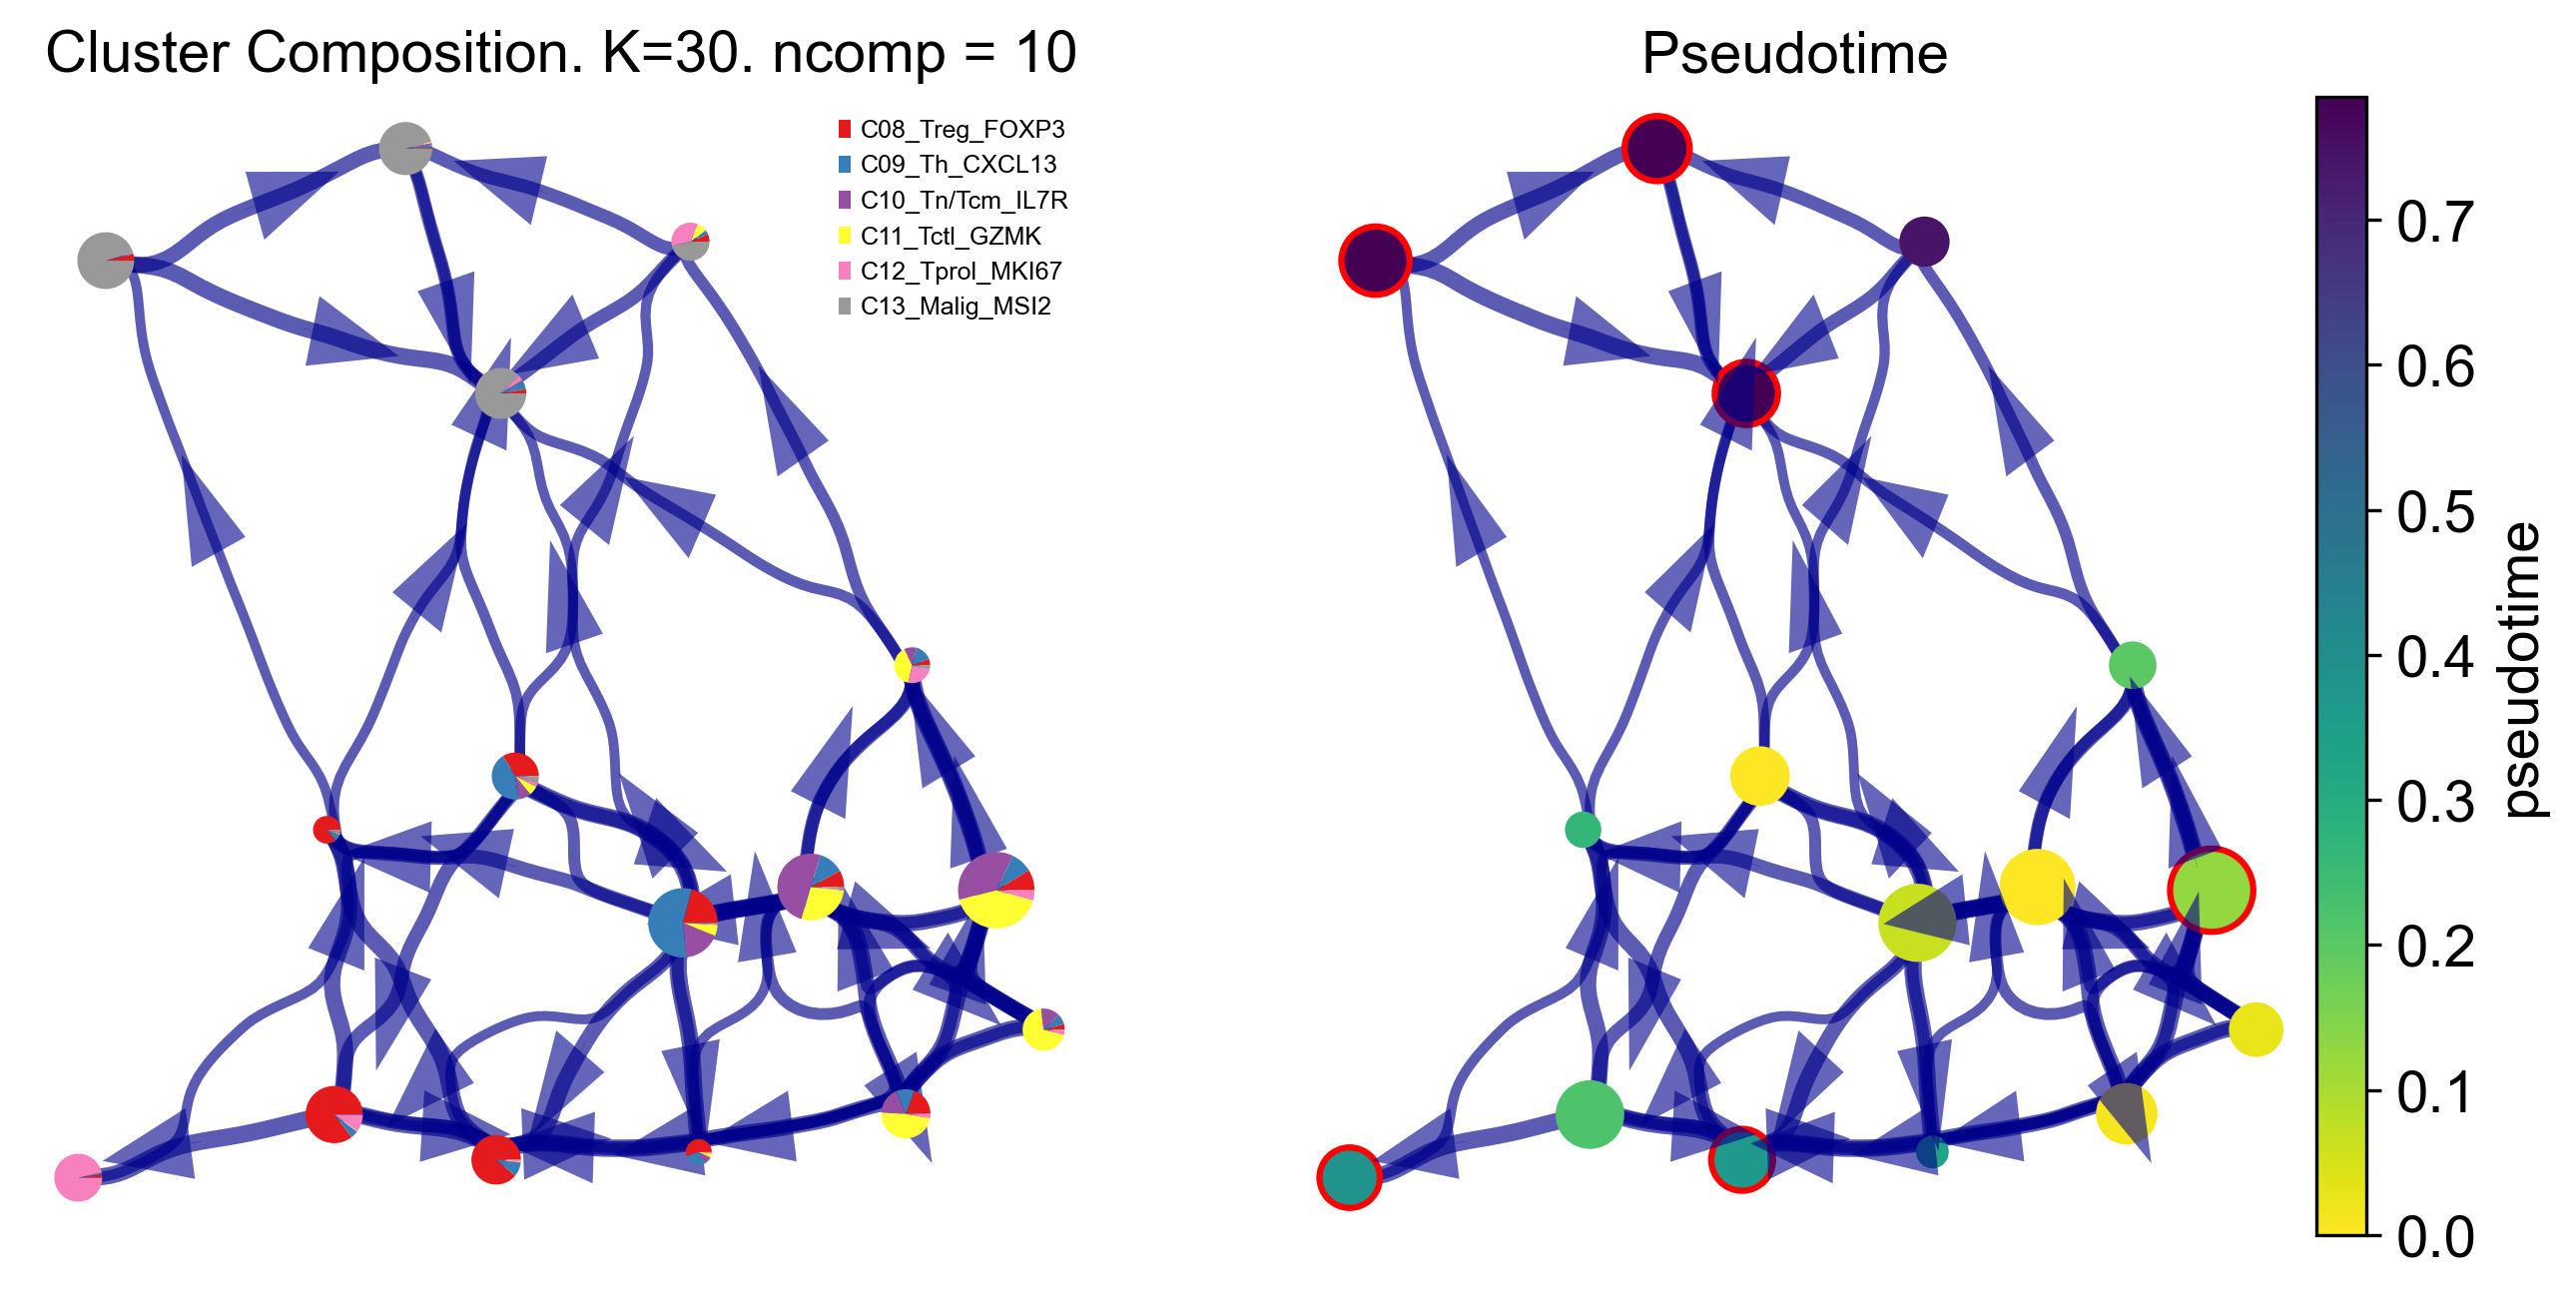

In [74]:
print(f'{datetime.now()}\tPlot Via2.0 cluster graph')

# f, ax, ax1=via.plot_piechart_viagraph(via_object=v0, cmap_piechart='viridis_r', cmap='viridis_r',  reference_labels=cluster_celltype_label, headwidth_arrow=0.4,
#                         highlight_terminal_clusters=True, show_legend=True)
# f.set_size_inches(10, 5)
f, ax, ax1=via.plot_piechart_viagraph(via_object=vCD4T, headwidth_arrow=0.2, show_legend=True, ax_text=False, pie_size_scale=0.6, cmap_piechart='Set1', 
                        highlight_terminal_clusters=True, size_node_notpiechart=0.8)
f.set_size_inches(10, 5)
f.savefig(f'{figPath}/pyVIA_CD4T.svg')

In [65]:
root = ['C01_Tn_CCR7'] #for reproducibility, we set the root here. the group level root assignment must correspond to a label that exists in the True-label parameter (must be passed inside a list). For autodetection based on rna-velocity it can be left as None. A single cell index can also be passed e.g. [256], means the 256th cell will be used as a root. Since we will be using the velocity matrices (see below), Via 2.0 will suggest a list of likely root cell states that the user can decide to choose between. It is helpful to examine the top 5 suggested roots and choose the one that seems most reasonable. Note in the output that Via 2.0's suggestions are almost all in the epibliast or Primitive streak state 
neighboring_terminal_states_threshold = 4
max_visual_outgoing_edges = 10#5 #used in differentiation flow chart plots
time_series = True
parc_numeric_cluster_labels = [i for i in adata_CD8T.obs['leiden-T']]
cluster_celltype_label = [i for i in adata_CD8T.obs['anno-subTfixed']]
use_velocity = False
velo_weight = 0.5
vCD8T = via.VIA(adata_CD8T.obsm['X_pca_harmony'][:, 0:n_pcs], true_label = cluster_celltype_label,
        edgepruning_clustering_resolution=edgepruning_clustering_resolution,
        edgepruning_clustering_resolution_local=1, knn=knn, memory=memory,
        root_user=root, random_seed=random_seed,
        knn_sequential_reverse=knn_sequential,
        gene_matrix=gene_matrix, velocity_matrix=velocity_matrix,
        velo_weight=velo_weight,
        )

In [66]:
print(f'{datetime.now()}\tRun Via2.0')
vCD8T.run_VIA()
print(f'{datetime.now()}\tEnd Via2.0 computation')

2025-05-23 11:27:51.887204	Run Via2.0
2025-05-23 11:27:51.888364	Running VIA over input data of 22616 (samples) x 10 (features)
2025-05-23 11:27:51.888400	Knngraph has 30 neighbors
2025-05-23 11:27:59.488298	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 48.4 % of edges. 
2025-05-23 11:27:59.630256	Number of connected components used for clustergraph  is 1
2025-05-23 11:28:01.517664	Commencing community detection
2025-05-23 11:28:04.617197	Finished community detection. Found 39 clusters.
2025-05-23 11:28:04.623580	Merging 21 very small clusters (<10)
2025-05-23 11:28:04.628196	Finished detecting communities. Found 18 communities
2025-05-23 11:28:04.629659	Making cluster graph. Global cluster graph pruning level: 0.15
2025-05-23 11:28:04.741481	Graph has 1 connected components before pruning
2025-05-23 11:28:04.743728	Graph has 1 connected components after pruning
2025-05-23 11:28:04.743896	Graph has 1 connected components after reconnecting
2025-05-2

/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/core.py:176: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  g.set_node_ids(node_ids=None,


  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
2025-05-23 11:28:10.046560	Identifying terminal clusters corresponding to unique lineages...
2025-05-23 11:28:10.046581	Closeness:[0, 3, 4, 5, 8, 11, 16]
2025-05-23 11:28:10.046590	Betweenness:[0, 1, 3, 5, 6, 8, 12, 15, 16, 17]
2025-05-23 11:28:10.046597	Out Degree:[0, 3, 5, 8, 11, 16]
2025-05-23 11:28:10.046790	Cluster 3 had 3 or more neighboring terminal states [0, 8, 11] and so we removed cluster 0
2025-05-23 11:28:10.046824	We removed cluster 11 from the shortlist of terminal states
2025-05-23 11:28:10.046949	Terminal clusters corresponding to unique lineages in this component are [3, 5, 8, 16] 
2025-05-23 11:28:10.046968	Calculating lineage probability at memory 100


/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/core.py:176: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  g.set_node_ids(node_ids=None,


  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-23 11:28:14.343980	Cluster or terminal cell fate 3 is reached 996.0 times
2025-05-23 11:28:14.379026	Cluster or terminal cell fate 5 is reached 29.0 times
2025-05-23 11:28:14.403238	Cluster or terminal cell fate 8 is reached 996.0 times
2025-05-23 11:28:14.436925	Cluster or terminal cell fate 16 is reached 13.0 times
2025-05-23 11:28:14.457369	There are (4) terminal clusters corresponding to unique lineages {3: 'C13_Malig_MSI2', 5: 'C12_Tprol_MKI67', 8: 'C13_Malig_MSI2', 16: 'C12_Tprol_MKI67'}
2025-05-23 11:28:14.457398	Begin projection of pseudotime and lineage likelihood
2025-05-23 11:28:15.097981	Cluster graph layout based on forward biasing
2025-05-23 11:28:15.099288	Starting make edgebundle viagraph...
2025-05-23 11:28:15.099318	Make via clustergraph edgebundle
2025-05-23 11:28:15.315181	Hammer dims: Nodes shape: (18, 2) Edges shape: (112, 3)
2025-05-23 11:28:15.318152	Graph has 1 connected components before pruning
2025-05-23 11:28:15.323132	Graph has 5 connected componen

/home/rzh/BCY/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2025-05-23 11:55:14.215181	Plot Via2.0 cluster graph
tune edges False


/home/rzh/BCY/lib/python3.10/site-packages/pyVIA/plotting_via.py:3702: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(node_pos[:, 0], node_pos[:, 1],


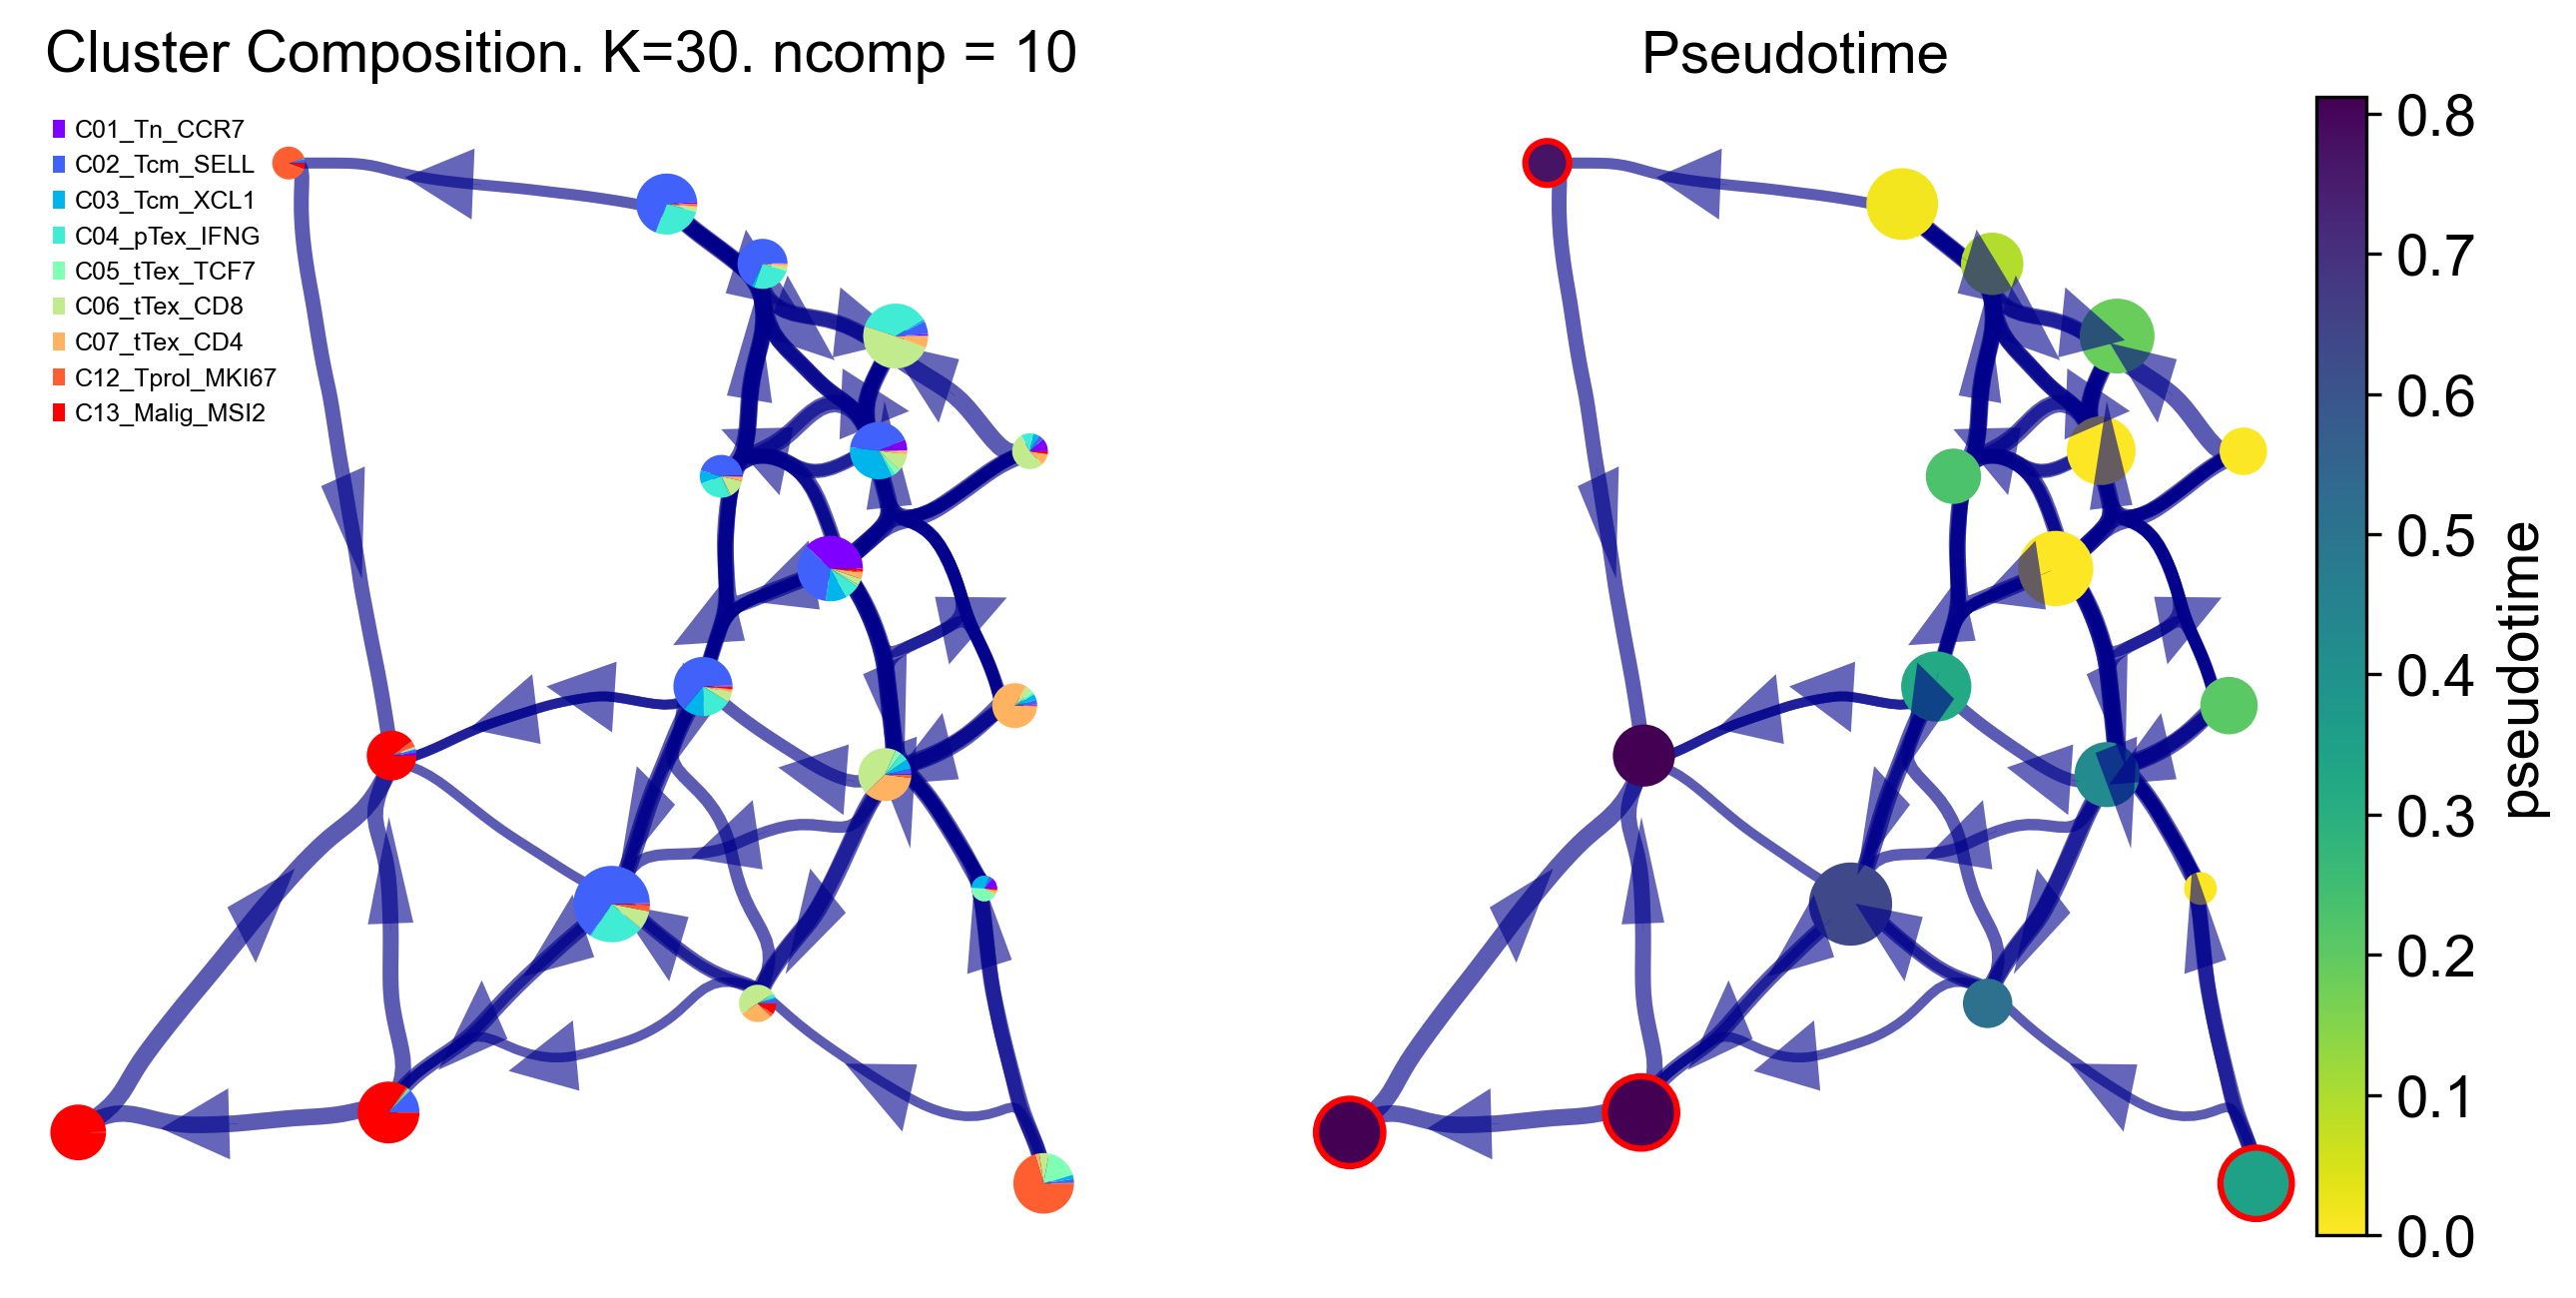

In [73]:
print(f'{datetime.now()}\tPlot Via2.0 cluster graph')

# f, ax, ax1=via.plot_piechart_viagraph(via_object=v0, cmap_piechart='viridis_r', cmap='viridis_r',  reference_labels=cluster_celltype_label, headwidth_arrow=0.4,
#                         highlight_terminal_clusters=True, show_legend=True)
# f.set_size_inches(10, 5)
f, ax, ax1=via.plot_piechart_viagraph(via_object=vCD8T, 
                                      headwidth_arrow=0.2, 
                                      show_legend=True, 
                                      ax_text=False, 
                                      pie_size_scale=0.6, 
                        highlight_terminal_clusters=True, size_node_notpiechart=0.8)
f.set_size_inches(10, 5)
f.savefig(f'{figPath}/pyVIA_CD8T.svg')